In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Data Science/MicrosoftStock.csv")
df

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.710,27.3100,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.920,27.5000,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.000,27.7500,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.110,27.8800,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.060,27.8700,28.04,32663174,MSFT
...,...,...,...,...,...,...,...,...
1254,391452,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT
1255,391453,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT
1256,391454,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT
1257,391455,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [129]:
df.drop("index",axis=1,inplace=True)
df=df.set_index(pd.to_datetime(df["date"]))
df.head(2)

,date,open,high,low,close,volume,Name
date,,,,,,,
2013-02-08,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
2013-02-11,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT


In [130]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,95.140000,96.070000,93.720000,95.010000,2.483542e+08


In [131]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [132]:
from datetime import datetime as dt
df["Month"]=df.index.month
df["Year"]=df.index.year
df=df.drop(["date","Name"],axis=1)
df.head(2)

,open,high,low,close,volume,Month,Year
date,,,,,,,
2013-02-08,27.35,27.71,27.31,27.55,33318306,2,2013
2013-02-11,27.65,27.92,27.50,27.86,32247549,2,2013


# Moving Averages

In [133]:
close_arr=np.array(df["close"])
def moving_avg(window,data):
    ma=[]
    for i in range (window):
        ma.append(np.nan)
    sum=0.0
    for i in range(window, len(data)):
        for j in range(i-window,i):
            sum+=data[j]
        ma.append(sum/window)
    return ma

#Mov_Avg=moving_avg(10,close_arr)

df["Moving_Average_10"]=moving_avg(10,close_arr)
df["Moving_Average_20"]=moving_avg(20,close_arr)
df.tail()

,open,high,low,close,volume,Month,Year,Moving_Average_10,Moving_Average_20
date,,,,,,,,,
2018-02-01,94.79,96.070,93.5813,94.26,47227882,2,2018,63288.395,62697.77775
2018-02-02,93.64,93.970,91.5000,91.78,47867753,2,2018,63381.160,62788.45475
2018-02-05,90.56,93.240,88.0000,88.00,51031465,2,2018,63474.103,62879.36525
2018-02-06,86.89,91.475,85.2500,91.33,67998564,2,2018,63566.685,62970.26625
2018-02-07,90.49,91.770,89.2000,89.61,41107592,2,2018,63659.210,63061.31975


# Exponential Moving Averages

In [134]:
def exp_moving_avg(window,data):
    multiplier=2/(window+1)
    ema=[]
    for i in range(window):
        ema.append(np.nan)
    sum,val=0.0,0.0
    for i in range(window):
        sum+=data[i]
    ema.append(sum/window)
    for i in range(window+1, len(data)):
        val=(data[i]*multiplier)+(ema[i-1]*(1-multiplier))
        ema.append(val)
    return ema

#EMA=exp_moving_avg(10,close_arr)

df["Exp_Moving_Average_10"]=exp_moving_avg(10,close_arr)
df["Exp_Moving_Average_20"]=exp_moving_avg(20,close_arr)
df.head(22)

,open,high,low,close,volume,Month,Year,Moving_Average_10,Moving_Average_20,Exp_Moving_Average_10,Exp_Moving_Average_20
date,,,,,,,,,,,
2013-02-08,27.3500,27.71,27.310,27.550,33318306,2,2013,NaN,NaN,NaN,NaN
2013-02-11,27.6500,27.92,27.500,27.860,32247549,2,2013,NaN,NaN,NaN,NaN
2013-02-12,27.8800,28.00,27.750,27.880,35990829,2,2013,NaN,NaN,NaN,NaN
2013-02-13,27.9300,28.11,27.880,28.030,41715530,2,2013,NaN,NaN,NaN,NaN
2013-02-14,27.9200,28.06,27.870,28.040,32663174,2,2013,NaN,NaN,NaN,NaN
2013-02-15,28.0400,28.16,27.875,28.010,49650538,2,2013,NaN,NaN,NaN,NaN
2013-02-19,27.8801,28.09,27.800,28.045,38804616,2,2013,NaN,NaN,NaN,NaN
2013-02-20,28.1300,28.20,27.830,27.870,44109412,2,2013,NaN,NaN,NaN,NaN
2013-02-21,27.7400,27.74,27.230,27.490,49078338,2,2013,NaN,NaN,NaN,NaN


# Bollinger Bands

In [135]:
#Calculating standard deviation which is needed for bollinger bands calculation

def STD(window, data):
    std=[]
    sum, mean, sq_sum, var, val=0.0,0.0,0.0,0.0,0.0
    for i in range(window):
        std.append(np.nan)
    for i in range(window, len(data)):
        for j in range(i-window+1,i+1):
            sum+=data[i]
        mean=sum/window
        for j in range(i-window+1,i+1):
            sq_sum+=(data[i]-mean)**2
        var=sq_sum/window
        val=np.sqrt(var)
        std.append(val)
    return std
    
#Std=STD(14, close_arr)
#print(len(Std)) 

def bollinger_bands(df, window):
    df["BB_Middle"]=moving_avg(window, close_arr)
    df["BB_Std"]=STD(window, close_arr)
    df["BB_Upper"]=df["BB_Middle"]+(df["BB_Std"]*2)
    df["BB_Lower"]=df["BB_Middle"]-(df["BB_Std"]*2)
    return df

#Taking Standard 20 day window to calculate the values
df=bollinger_bands(df,20)
df.head(22)

,open,high,low,close,volume,Month,Year,Moving_Average_10,Moving_Average_20,Exp_Moving_Average_10,Exp_Moving_Average_20,BB_Middle,BB_Std,BB_Upper,BB_Lower
date,,,,,,,,,,,,,,,
2013-02-08,27.3500,27.71,27.310,27.550,33318306,2,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,27.6500,27.92,27.500,27.860,32247549,2,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-12,27.8800,28.00,27.750,27.880,35990829,2,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-13,27.9300,28.11,27.880,28.030,41715530,2,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-14,27.9200,28.06,27.870,28.040,32663174,2,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-15,28.0400,28.16,27.875,28.010,49650538,2,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-19,27.8801,28.09,27.800,28.045,38804616,2,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-20,28.1300,28.20,27.830,27.870,44109412,2,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-21,27.7400,27.74,27.230,27.490,49078338,2,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Relative Strength Index

In [136]:
#Measures the moentum and indicates overbought(>70) or oversold(<30)conditions.

def RSI(window, data):
    gain=[]
    loss=[]
    rsi=[]
    gain.append(np.nan)
    loss.append(np.nan)
    for i in range(1,len(data)):
        delta=data[i]-data[i-1]
        if (delta>0):
            gain.append(delta)
        else:
            gain.append(0)
        if (delta<0):
            loss.append(np.abs(delta))
        else:
            loss.append(0)
            
    #print(gain)
      
    avg_gain=[]
    avg_loss=[]
    sum1,sum2, val1,val2,=0.0,0.0, 0.0,0.0
    for i in range(window):
        avg_gain.append(np.nan)
        avg_loss.append(np.nan)
        rsi.append(np.nan)
    for i in range(1,window+1):
        sum1+=gain[i] 
        sum2+=loss[i]
    #print(sum1)
    avg_gain.append(sum1/window)
    avg_loss.append(sum2/window)
    #print(avg_loss)
    for i in range(window+1, len(data)):
        val1=((avg_gain[i-1]*13) + gain[i])/window
        avg_gain.append(val1)
        val2=((avg_loss[i-1]*13) + loss[i])/window
        avg_loss.append(val2)
    #print(avg_loss)    
    rs,val3=0.0,0.0
    for i in range(window, len(data)):
        rs=avg_gain[i]/avg_loss[i]
        val3=100-(100/(1+rs))
        rsi.append(val3)
    return rsi    
      
df["RSI"]=RSI(14, close_arr)
df.tail(2)

,open,high,low,close,volume,Month,Year,Moving_Average_10,Moving_Average_20,Exp_Moving_Average_10,Exp_Moving_Average_20,BB_Middle,BB_Std,BB_Upper,BB_Lower,RSI
date,,,,,,,,,,,,,,,,
2018-02-06,86.89,91.475,85.25,91.33,67998564,2,2018,63566.685,62970.26625,91.685494,90.870886,62970.26625,1.136511e+06,2.335993e+06,-2.210052e+06,53.574649
2018-02-07,90.49,91.770,89.20,89.61,41107592,2,2018,63659.210,63061.31975,91.308132,90.750802,63061.31975,1.138292e+06,2.339645e+06,-2.213522e+06,48.536102


# Dropping the NaN values and saving it to a different dataframe

In [137]:
df1=df.dropna(axis=0)
df1.head()
print(len(df))
print(len(df1))

1259
1239


# Visualizations

## Closing Price with Moving Averages after removing NaN values: From new dataframe

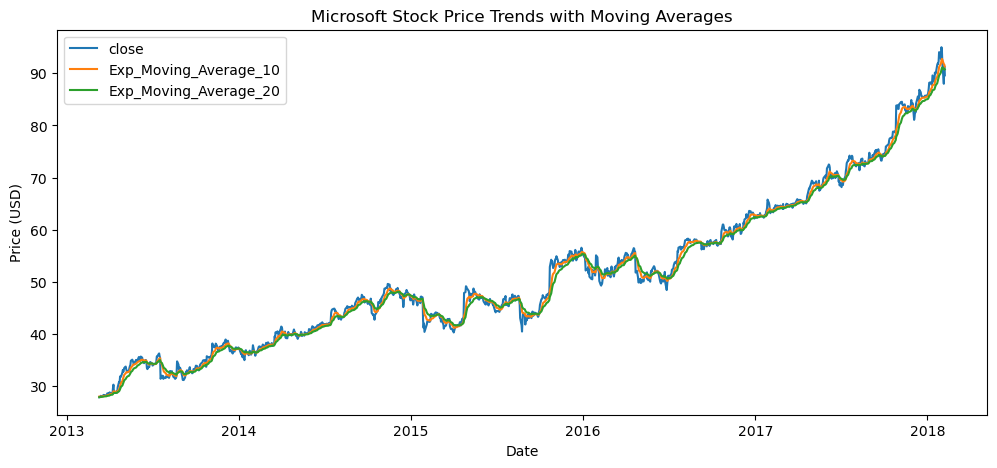

In [138]:
plt.figure(figsize=(12,5))
plt.plot(df1.index,df1["close"], label="close")
#plt.plot(df1.index,df1["Moving_Average_10"], label="Moving_Average_10")
plt.plot(df1.index,df1["Exp_Moving_Average_10"], label="Exp_Moving_Average_10")
plt.plot(df1.index,df1["Exp_Moving_Average_20"], label="Exp_Moving_Average_20")
#plt.plot(df1.index,df1["Moving_Average_20"], label="Moving_Average_20")
plt.title("Microsoft Stock Price Trends with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

## Closing Price with Date

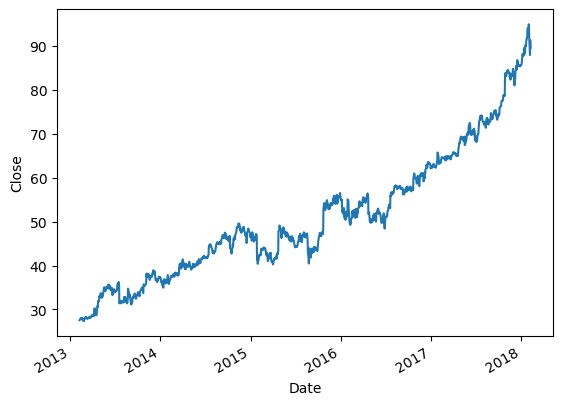

In [139]:
df["close"].plot()
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

## Price trends with Time 

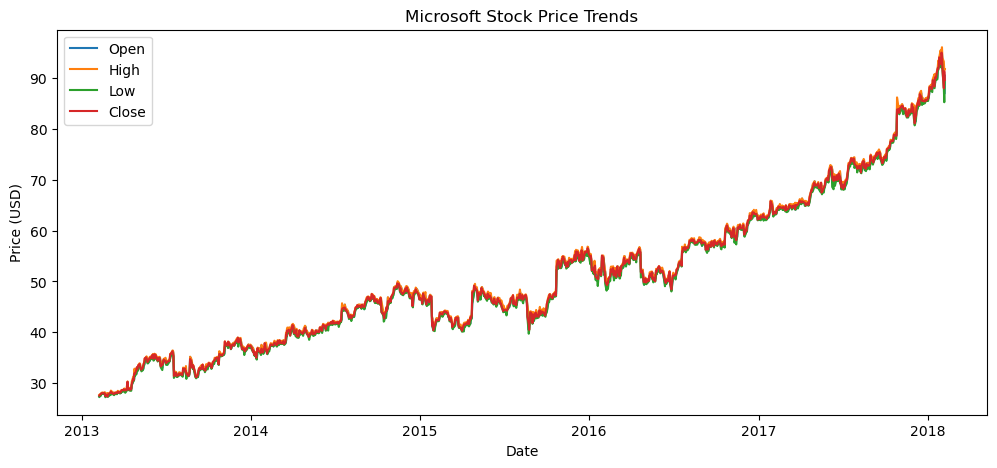

In [140]:
plt.figure(figsize=(12,5))
plt.plot(df.index,df["open"], label="Open")
plt.plot(df.index,df["high"], label="High")
plt.plot(df.index,df["low"], label="Low")
plt.plot(df.index,df["close"], label="Close")
plt.title("Microsoft Stock Price Trends")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

## Closing price with Bollinger Bands

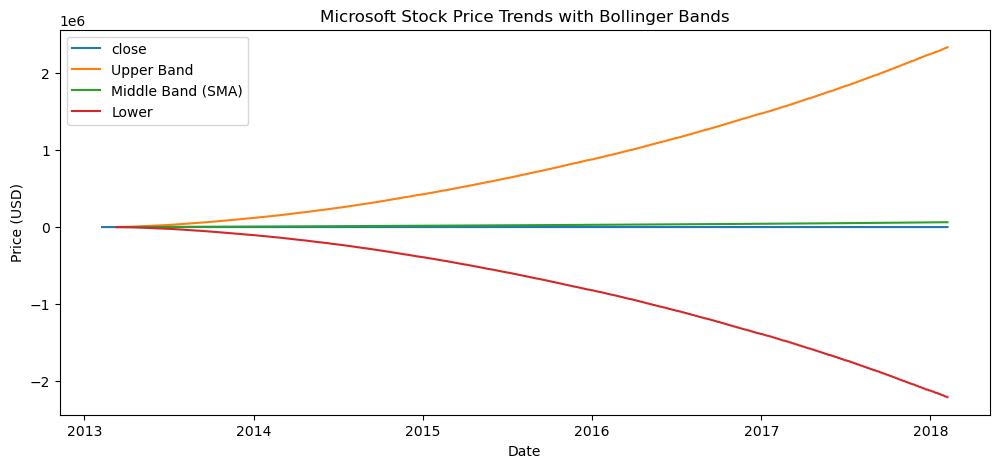

In [143]:
plt.figure(figsize=(12,5))
plt.plot(df.index,df["close"], label="close")
plt.plot(df.index,df["BB_Upper"], label="Upper Band")
plt.plot(df.index,df["BB_Middle"], label="Middle Band (SMA)")
plt.plot(df.index,df["BB_Lower"], label="Lower")
plt.title("Microsoft Stock Price Trends with Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

## Scatter Plot: Price vs Volume

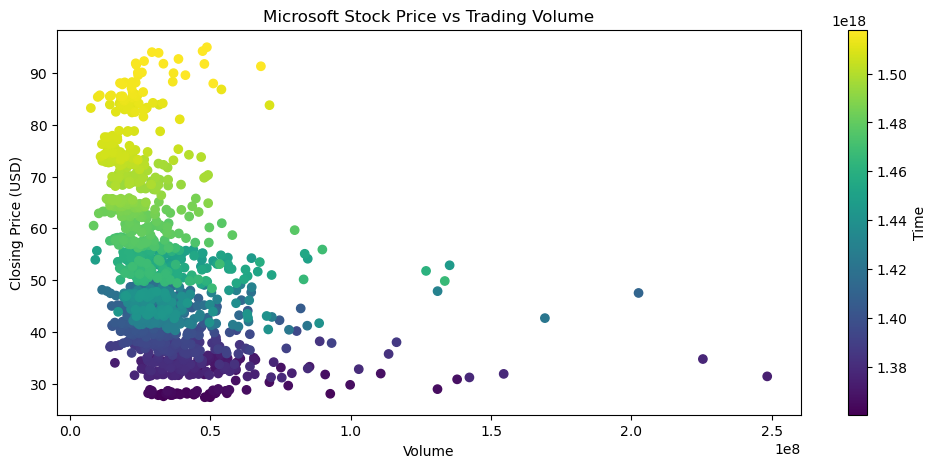

In [146]:
plt.figure(figsize=(12,5))
plt.scatter(df["volume"],df["close"], c=df.index.astype(int))
plt.colorbar(label="Time")
plt.title("Microsoft Stock Price vs Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Closing Price (USD)")
#plt.legend()
plt.show()

## Monthly Average Price Trend 

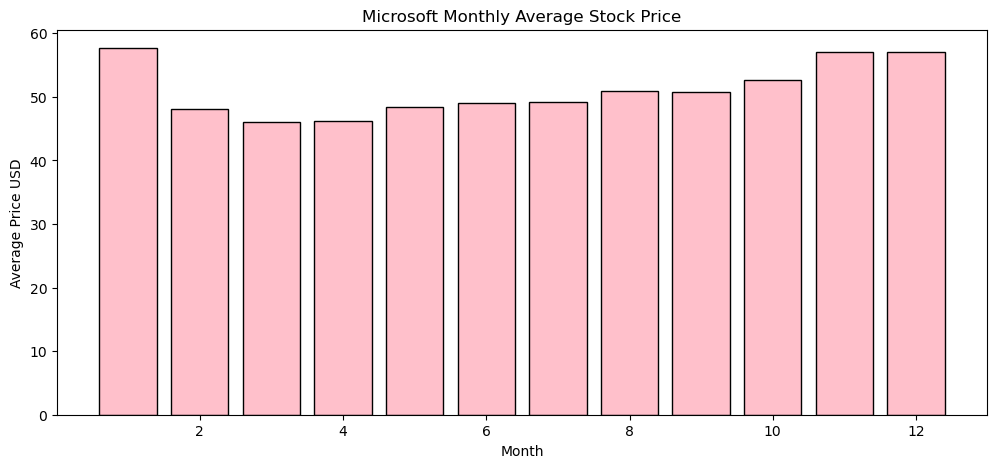

In [147]:
monthly_avg=df.groupby("Month")["close"].mean()
plt.figure(figsize=(12,5))
plt.bar(monthly_avg.index, monthly_avg.values, color= "pink", edgecolor="black")
plt.title('Microsoft Monthly Average Stock Price')
plt.xlabel("Month")
plt.ylabel("Average Price USD")
plt.show()

## Yearly Trend Analysis

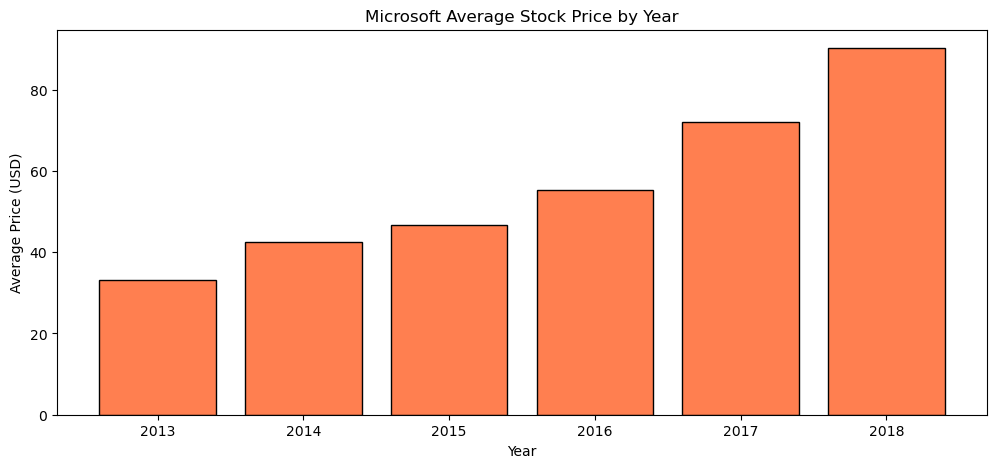

In [148]:
yearly_avg=df.groupby("Year")["close"].mean()
plt.figure(figsize=(12,5))
plt.bar(yearly_avg.index,yearly_avg.values, color= "coral", edgecolor="black")
plt.title("Microsoft Average Stock Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Price (USD)")
plt.show()

## Correlation Heatmap 

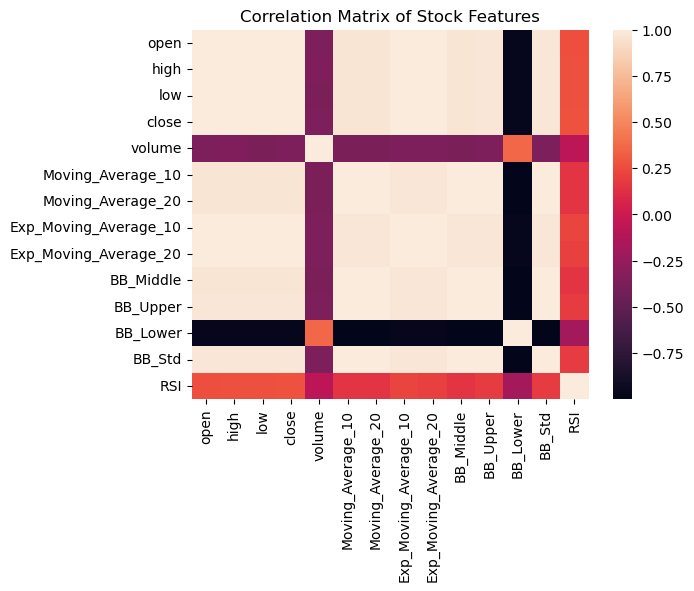

In [149]:
corr_matrix=df[["open","high","low","close","volume",
              "Moving_Average_10","Moving_Average_20","Exp_Moving_Average_10","Exp_Moving_Average_20",
              "BB_Middle","BB_Upper","BB_Lower","BB_Std", "RSI"]].corr()
sns.heatmap(corr_matrix)
plt.title("Correlation Matrix of Stock Features")
plt.show()

Most of the features are correlated. BB_Lower has no correlation with other features except Volume. RSI has a little value 
greater than zero with all features. Volume too has no correlation with almost other features. Rest all are strongly 
correlated.

## Price vs RSI Scatter Plot 

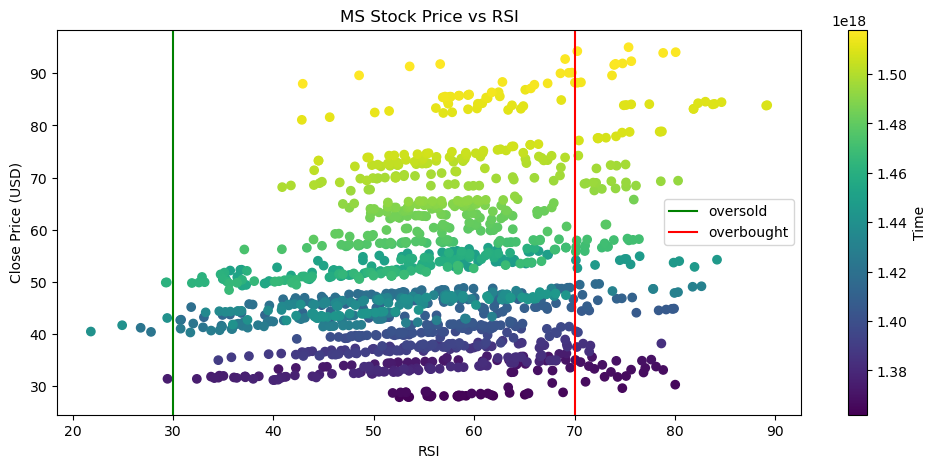

In [150]:
plt.figure(figsize=(12,5))
plt.scatter(df["RSI"],df["close"], c=df.index.astype(int))
plt.colorbar(label="Time")
plt.title("MS Stock Price vs RSI")
plt.axvline(x=30, color="g", label="oversold")
plt.axvline(x=70, color="r", label="overbought")
plt.xlabel("RSI")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

# Training using Linear Regression Model

In [155]:
df=df.dropna(axis=0)
features=["open","high","low","volume",
        "Moving_Average_10","Moving_Average_20","Exp_Moving_Average_10","Exp_Moving_Average_20",              
         "BB_Middle","BB_Upper","BB_Lower","BB_Std","RSI"]
X=df[features].copy()
Y=df["close"].copy()

train_size=int(len(df)*0.8)

X_train=X[:train_size]
X_test=X[train_size:]
Y_train=Y[:train_size]
Y_test=Y[train_size:]
print(len(X_train))

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

Y_train_sc=sc.fit_transform(Y_train.values.reshape(-1,1))
Y_test_sc=sc.transform(Y_test.values.reshape(-1,1))

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_sc, Y_train_sc)

991


LinearRegression()

# Evaluating the LR Model: Calculating Metrics

In [156]:
#Make Predictions
Y_train_lr_pred=lr.predict(X_train_sc)
Y_test_lr_pred=lr.predict(X_test_sc)

#Inverse transforms
Y_test_lr_pred_original=sc.inverse_transform(Y_test_lr_pred)
Y_train_lr_pred_original=sc.inverse_transform(Y_train_lr_pred)


from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

lr_train_rmse=np.sqrt(mean_squared_error(Y_train, Y_train_lr_pred_original))
lr_train_r2=r2_score(Y_train, Y_train_lr_pred_original)
lr_train_mae=mean_absolute_error(Y_train, Y_train_lr_pred_original)

lr_test_rmse=np.sqrt(mean_squared_error(Y_test, Y_test_lr_pred_original))
lr_test_r2=r2_score(Y_test, Y_test_lr_pred_original)
lr_test_mae=mean_absolute_error(Y_test, Y_test_lr_pred_original)

print("LR MSE (Train):", lr_train_rmse)
print("LR R2 (Train):", lr_train_r2)
print("LR MAE (Train):", lr_train_mae)
print("LR RMSE (Test):", lr_test_rmse)
print("LR R2 (Test):", lr_test_r2)
print("LR MAE (Test):", lr_test_mae)

LR MSE (Train): 0.19996263122682648
LR R2 (Train): 0.9994982574413929
LR MAE (Train): 0.1509384315375375
LR MSE (Test): 0.30929955420440247
LR R2 (Test): 0.9985874744153264
LR MAE (Test): 0.20209708424633266


# Training the Dataset using Random Forrest model

In [203]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5,min_samples_leaf=3,
                         bootstrap=True,n_jobs=-1,random_state=42, verbose=1)

#Y_train_sc_reshaped=np.reshape(Y_train_sc,(-1,1))
rf.fit(X_train_sc, Y_train_sc.ravel())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=5,
                      n_jobs=-1, random_state=42, verbose=1)

# Evaluating the RF Model: Calculating Metrics

In [204]:
#Making Predictions
Y_train_rf_pred=rf.predict(X_train_sc)
Y_test_rf_pred=rf.predict(X_test_sc)

#Inverse transforms
Y_train_rf_pred_original=sc.inverse_transform(Y_train_rf_pred.reshape(-1,1))
Y_test_rf_pred_original=sc.inverse_transform(Y_test_rf_pred.reshape(-1,1))
Y_train_original=sc.inverse_transform(Y_train_sc)
Y_test_original=sc.inverse_transform(Y_test_sc)

#Calculating Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
rf_train_rmse=np.sqrt(mean_squared_error(Y_train_original, Y_train_rf_pred_original))
rf_train_r2=r2_score(Y_train_original, Y_train_rf_pred_original)
rf_train_mae=mean_absolute_error(Y_train_original, Y_train_rf_pred_original)

rf_test_rmse=np.sqrt(mean_squared_error(Y_test_original, Y_test_rf_pred_original))
rf_test_r2=r2_score(Y_test_original, Y_test_rf_pred_original)
rf_test_mae=mean_absolute_error(Y_test_original, Y_test_rf_pred_original)

#print(Y_test_rf_pred_original)

print("RF MSE (Train):", rf_train_rmse)
print("RF R2 (Train):", rf_train_r2)
print("RF MAE (Train):", rf_train_mae)
print("RF RMSE (Test):", rf_test_rmse)
print("RF R2 (Test):", rf_test_r2)
print("RF MAE (Test):", rf_test_mae)

RF MSE (Train): 0.1630074711106246
RF R2 (Train): 0.9996665749122049
RF MAE (Train): 0.11567051186280593
RF MSE (Test): 13.118736223167943
RF R2 (Test): -1.541099872504772
RF MAE (Test): 10.25178921608075


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Seeing the RF R2(Train)>0.95 and RF R2(Test) <0, it indictaes that the model is completely overfitted. The parameters have been altered with other constraints given like maximum depth of each tree, minimum sample split, max sample leaf but nothing worked. So in the next step I'm using Unscaled Data for training RF Model

## Training RF Model on Unscaled Data

In [208]:
from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10,min_samples_leaf=5,max_features="sqrt",
                         bootstrap=True,n_jobs=-1,random_state=42, verbose=1)

#Y_train_sc_reshaped=np.reshape(Y_train_sc,(-1,1))
rf_model.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_jobs=-1, random_state=42,
                      verbose=1)

In [209]:
#Making Predictions
Y_test_pred_rf=rf_model.predict(X_test)

#Calculate Mterics
rf_r2=r2_score(Y_test, Y_test_pred_rf)
rf_rmse=np.sqrt(mean_squared_error(Y_test,Y_test_pred_rf))
rf_mae=mean_absolute_error(Y_test, Y_test_pred_rf)

print("RF RMSE (Test):", rf_rmse)
print("RF R2 (Test):", rf_r2)
print("RF MAE (Test):", rf_mae)

RF RMSE (Test): 13.485676703559811
RF R2 (Test): -1.6852407095708006
RF MAE (Test): 10.689396657670708


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Still the metrics are worse.

CONCLUSION:

1)Linear Regression working Perfectly. The metrics are well within valid range.

2)Random Forrst Model tested with different parameters and on both scaled and unscaled data. The metrics show poor results. The plot below shows that Random Forrest has failed to reproduce the Results.

# Feature Importance

In [214]:
feature_imp=pd.DataFrame({"Feature": features,"Importance":rf.feature_importances_})
feature_imp

,Feature,Importance
0,open,0.008007
1,high,0.319948
2,low,0.651869
3,volume,0.000057
4,Moving_Average_10,0.000559
5,Moving_Average_20,0.000535
6,Exp_Moving_Average_10,0.007709
7,Exp_Moving_Average_20,0.004016
8,BB_Middle,0.000687
9,BB_Upper,0.001248


# Visualizing Actual vs Predictions

## Plotting for LR model

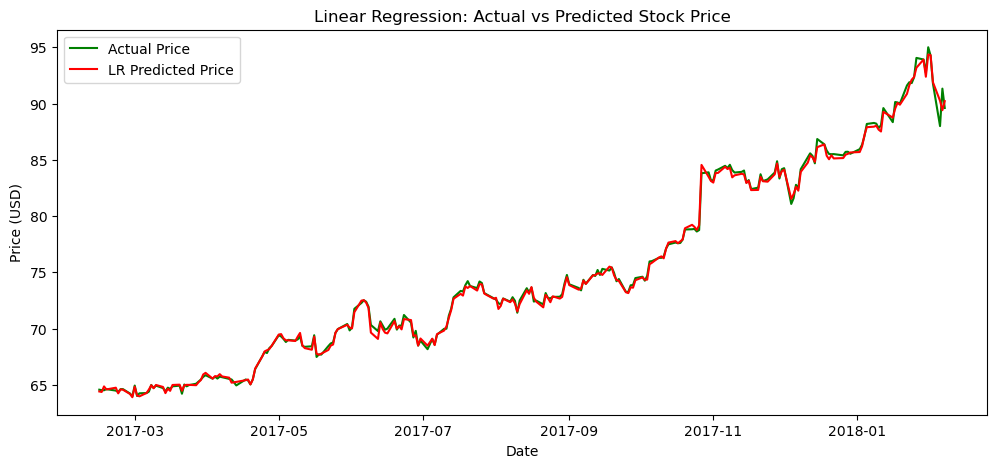

In [157]:
plt.figure(figsize=(12,5))
plt.plot(Y_test.index, Y_test.values, label='Actual Price', color="green")
plt.plot(Y_test.index, Y_test_lr_pred_original, label="LR Predicted Price", color="red")
plt.title("Linear Regression: Actual vs Predicted Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

Linear Regression has almost perfectly predicted the Stock price over testing set. This is the accepted Model and can be used to predict prices in Future with real-time data.

## Plotting for RF model

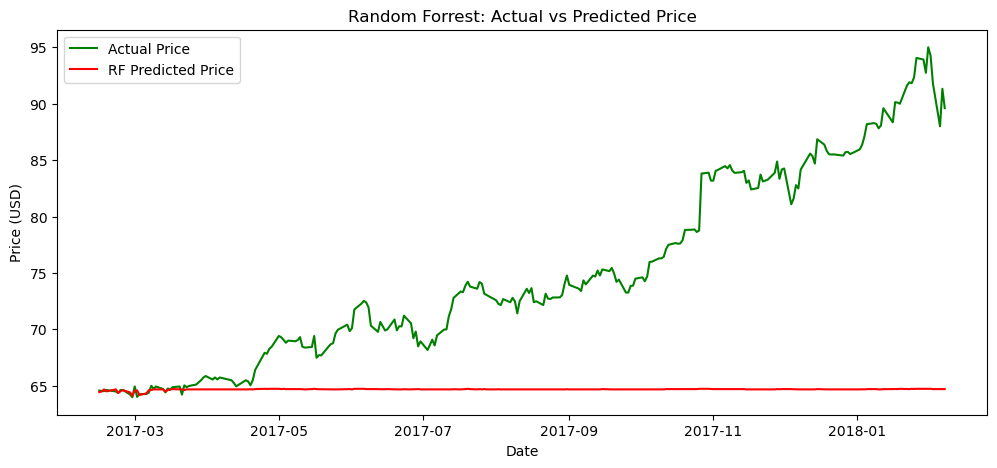

In [205]:
plt.figure(figsize=(12,5))
plt.plot(Y_test.index, Y_test_original, label="Actual Price", color="green")
plt.plot(Y_test.index, Y_test_rf_pred_original, label="RF Predicted Price", color= "red")
plt.title("Random Forrest: Actual vs Predicted Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

Random Forrest cannot predict the Stock price at all.It's showing extremely poor accuracy while Linear Regression has done it.The reason may be that Random Forrest is not suitable for this dataset or I'm using wrong set of parameters.

## Future Extensions

Adding real-time data for predictions using this trained Linear Regression model to see the accuracy.
Two more models that are preferred in Time series analysis:-

1)XGBoost
2)LSTM- Deep Learning component

I'll be working on these models to take real time data and do prediction for next 30 days.
Compare the metrics and choose the best model for stock price prediction